# CONDUÇÃO TÉRMICA BIDIMENSIONAL

*   PET - Física UFRN
*   Petiano : Matheus Felipe Freitas Tomaz
*   Data : 18 de Março de 2023


O objetivo `Notebook` é estudar a propagação do calor no espaço 2D em um meio material ( PLACA METÁLICA ).

Esse Notebook está divido nas sequintes seções :


*   **Entendendo o problema**
*   **Equação da difusão 2D ( Solução Computacional )**
*   **Densenvolvendo o Algoritmo**

## **Pré - requisitos**

É interessante que o leitor tenha lido o `Notebook` [Convecção, difusão e a equação de Burgers](https://github.com/GabrielWendell/PET.py/blob/main/Notebooks/Convec%C3%A7%C3%A3o%2C%20difus%C3%A3o%20e%20a%20equa%C3%A7%C3%A3o%20de%20Burgers.ipynb) [2] para um melhor entendimento da deduções feitas e dos requerimentos de paramêtros que seram computados e também [CONDUÇÃO TÉRMICA 1D](https://github.com/MathPhelip/PET.py/blob/main/CONDU%C3%87%C3%83O%20T%C3%89RMICA%201D.ipynb) [3].

## **Importando bibliotecas necessárias**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1 . APRESENTANDO O PROBLEMA

***

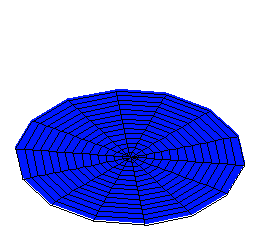

***

No problema anterior tinhamos computado um problema simples de condução térmica, no qual tinhamos uma barra cuja uma de suas pontos era aquecida e estudamos a propagação do calor ao longo da barra, ou seja, condução térmica 1D. Agora, vamos imaginar que tenhamos uma placa metálica quadrada e possua uma espessura desprezível. Começamos a esquenta-la em um dos seus lados e vamos estudar como ocorre a propagação do calor nessa placa, ou seja, uma condução 2D.

O fenômeno em questão é regido pela equação da difusão abaixo;

$$\tag{1} \nabla^2T = \frac{1}{D}\frac{∂T}{∂t}$$

*  $T$ : $T(x,y,t)$
*  $D$ : Difusividade térmica do material

A ideia é resolver computacionalmente essa equação de modo que nosso resultado numérico concorde com os resultados experimentais. Para isso, vamos considerar que a placa é simétrica e que o calor percorre somente ao longo do seu comprimento, de modo que podemos reescrever a Eqs. ( I ) como ;

$$\tag{2} \frac{∂^2T}{∂x^2}+\frac{∂^2T}{∂y^2} = \frac{1}{D}\frac{∂T}{∂t})$$

## 2 . SOLUÇÃO NUMÉRICA

***

Dado a Eq.(II), podemos aproximar a derivadas pelo método das diferenças finitas, de modo que

$$
\frac{∂^2T}{∂x^2} \approx  \frac{∂}{∂x}\left(\frac{T_{m+1,l, n} - T_{m-1,l, n}}{\Delta x}\right) = \frac{∂}{∂x}\left(\frac{T_{m+1,l, n}}{\Delta x}\right) - \frac{∂}{∂x}\left(\frac{T_{m-1,l, n}}{\Delta x}\right)
$$

$$
\frac{∂^2T}{∂y^2} \approx  \frac{∂}{∂y}\left(\frac{T_{m,l+1, n} - T_{m,l-1 n}}{\Delta y}\right) = \frac{∂}{∂y}\left(\frac{T_{m,l+1 n}}{\Delta y}\right) - \frac{∂}{∂y}\left(\frac{T_{m,l-1, n}}{\Delta y}\right)
$$

Finalmente temos que,

$$
\tag{3}\frac{∂^2T}{∂x^2} \approx \frac{T_{m+1,l, n} -2T_{m,l, n} + T_{m-1,l, n}} {\Delta x^2}\hspace{0.5cm} 
$$

$$
\tag{4}\frac{∂^2T}{∂y^2} \approx \frac{T_{m,l+1, n} -2T_{m,l, n} + T_{m,l-1, n}} {\Delta x^2}\hspace{0.5cm}
$$

$$
\tag{5}\frac{∂T}{∂t} \approx \frac{T_{m,l, n} - T_{m,l, n-1}}{\Delta t} \hspace{0.5cm}
$$

Dispondo III, IV e V em II, temos que

$$
\frac{T_{m+1,l, n} -2T_{m,l, n} + T_{m-1,l, n}} {\Delta x^2} + \frac{T_{m,l-1, n} -2T_{m,l, n} + T_{m,l-1, n}} {\Delta y^2}= \frac{1}{D}\frac{T_{m,l, n} - T_{m,l, n+1}}{\Delta t}
$$

Reorganizando os termos

$$
T_{m,l, n+1} = T_{m,l, n} + \frac{D\Delta t}{\Delta x^2}\left( T_{m+1,l, n} - 2T_{m,l, n} + T_{m-1,l, n}\right) + \frac{D\Delta t}{\Delta y^2}\left( T_{m,l+1, n} - 2T_{m,l, n} + T_{m,l-1, n}\right)
$$

Também podemos chegar a mesma solução expandindo a derivada T em série de Taylor em truncando nos termos de segundo ordem. Para melhor entendimento, você pode cusultar o `Notebook` apresentado nos pré - requisitos.

## 3 . DESENVOLVENDO O ALGORITMO

***

Tomemos uma placa com geometria de $10cm$ x $10cm$ que seja feita de alumínio, cuja a difusividade térmica é de $98.8$ $mm^2/s$.

In [2]:
Lx = 0.1 #m
Ly = 0.1 #m
D = 9.98*10**-4

Partindo de que a barra esteja inicialmente a temperatura ambiente e que seu lado esquerdo esteja sendo esquentado a 𝑇1=100°𝐶
 , podemos estabelecer a condições iniciais.

In [3]:
dx = 101
dy = 101

x_step = Lx/dx
y_step = Ly/dy
t_step = 1e-4 #Para fins de numérico, esse parâmetro precisa ser menor que x_step/D


T = np.zeros((dy,dx), float)

#Inicial condition
T[:,:] = 26
T[0,:] = 100 

epsilon = t_step/100
fator_x = (D*t_step)/(x_step**2)
fator_y = (D*t_step)/(y_step**2)

Vamos fazer a medição para 3 intantes de tempo diferentes

In [4]:
#tempo em (s)
t_1 = 0.01
t_2 = 0.1
t_3 = 10.0

x = np.linspace(0, Lx, dx)
y = np.linspace(0, Ly, dy)

Criando o loop

In [5]:
t = 0
while t<(t_3 + epsilon):
    Tp = T.copy()
    T[1:-1, 1:-1] = Tp[1:-1, 1:-1] + fator_y*(Tp[2:,1:-1]  - 2*Tp[1:-1,1:-1]  + Tp[0:-2,1:-1] ) + fator_x*(Tp[1:-1, 2:]  - 2*Tp[1:-1, 1:-1]  + Tp[1:-1, 0:-2]) 
    
    if t<t_1:
        T1 = np.copy(T)
    elif t<t_2:
        T2 = np.copy(T)
    elif t<t_3:
        T3 = np.copy(T)
        
    t+=t_step

Plotando os resultados

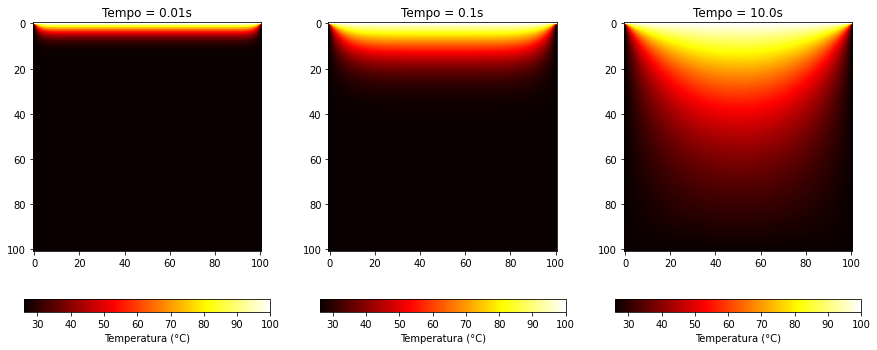

In [6]:
plt.figure(figsize=(15, 6))
plt.subplot(1,3,1)
plt.title(f'Tempo = {t_1}s')
plt.imshow(T1, cmap='hot')
plt.colorbar(label='Temperatura (°C)', location='bottom')
plt.subplot(1,3,2)
plt.title(f'Tempo = {t_2}s')
plt.imshow(T2,  cmap='hot')
plt.colorbar(label='Temperatura (°C)', location='bottom')
plt.subplot(1,3,3)
plt.title(f'Tempo = {t_3}s')
plt.imshow(T3,  cmap='hot')
plt.colorbar(label='Temperatura (°C)', location='bottom')
plt.show()

Observando a imagem, podemos dizer que nosso código reproduziu com êxito aquilo que teriamos obtido experimentalmente. Partindo desse código base, podemos fazer algumas alterações simples. Por exemplo, alterando o paramêtro `D` podemos estudar como os diferentes tipos de materiais reagem ao calor. É possível, também, modificar as condições iniciais e simular outras situações experimentais. Enfim, deixe a criatividade te guiar!

***
## REFERÊNCIAS

*   [1] *Mark Newman - Computational Physics (2013, University of Michigan)*
*   [2] *GabrielWendell - Convecção, difusão e a equação de Burgers (2021, Pet.py)*
*   [3] *MatheusFelipe - CONDUÇÃO TPERMICA 1D ( 2023, Pet. py )*